In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from sympy.vector import CoordSys3D

from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.8,  rc={"lines.linewidth": 5})

## Problema 1

<font size=3px>Uma pessoa na beira de um um poço lança uma bola para cima com velocidade
inicial $v_0$. Após subir verticalmente a bola cai no fundo do poço, que possui profundidade
$H$. Assuma que a bola foi lançada de uma altura $h$ a partir da beira do poço.<br>
a) Determine a posição da bola em um instante qualquer $t$ (após seu lançamento).<br>
b) Em que instante a bola atinge o fundo do poço?<br>
Assuma que a aceleração da gravidade é (em módulo) $g = 9,8$ m/s$^2$.
</font>

In [2]:
#Definir variaveis/parametros:
x0,v0,a,t0,t,g,h,H = sp.symbols('x_0,v_0,a,t_0,t,g,h,H')

In [3]:
#Trajetoria da bola:
a = -g #Orientando o eixo x para cima!
x0 = h #Colocando a origem na beira do poço
t0 = 0 #Iniciando o tempo no lançamento da bola
x = lambda t: x0 + v0*(t-t0)  + a*((t-t0)**2)/2
x(t)

-g*t**2/2 + h + t*v_0

In [4]:
#Determinar o momento que a bola atinge o fundo do poço: x(t) = -H:
tsol = sp.solve(sp.Eq(x(t),-H),t)
print('soluções:')
display(tsol[0]),display(tsol[1])

soluções:


(v_0 - sqrt(2*H*g + 2*g*h + v_0**2))/g

(v_0 + sqrt(2*H*g + 2*g*h + v_0**2))/g

(None, None)

In [5]:
#Definindo as constantes:
pars = {g : 9.8, h : 1.5, H : 3., v0 : 5.}

In [6]:
#Soluções numéricas
print('soluções:')
display(tsol[0].subs(pars),tsol[1].subs(pars))

soluções:


-0.575464169654725

1.59587233292003

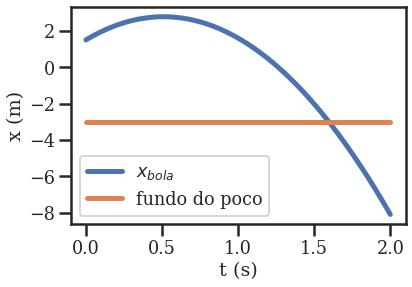

In [7]:
#Plot das trajetória
fig = plt.figure()

#Obter equações numéricas:
xf = sp.lambdify(t,x(t).subs(pars))

tpts = np.linspace(0.,2.,100)
plt.plot(tpts,xf(tpts),label=r'$x_{bola}$')
plt.plot(tpts,[-H.subs(pars).evalf()]*tpts.size,label='fundo do poco')
plt.xlabel(r't (s)')
plt.ylabel(r'x (m)')
leg = plt.legend()
plt.show()

## Problema 2

<font size=3px>Um motorista dirigindo com uma velocidade constante de 45,0 m/s passa sem perceber por um bloqueio da polícia.<br>
Um segundo após a passagem do carro, a polícia sai em perseguição a ele,com uma aceleração constante de 3,00 m/s$^2$. <br>
Depois de quanto tempo o policial alcança o carro perseguido?</font>

In [8]:
#Definir variaveis/parametros:
xC0,vC0,aC,tC0,tP0,xP0,vP0,aP,t = sp.symbols('x_0^C,v_0^C,a^C,t_0^C,t_0^P,x_0^P,v_0^P,a^P,t')

In [9]:
#Trajetoria do carro:
xC = lambda t: xC0 + vC0*(t-tC0)  + aC*((t-tC0)**2)/2
xC(t)

a^C*(t - t_0^C)**2/2 + v_0^C*(t - t_0^C) + x_0^C

In [10]:
#Trajetoria do carro de polícia:
xP = lambda tt: xP0 + vP0*(t-tP0)  + aP*((t-tP0)**2)/2
xP(t)

a^P*(t - t_0^P)**2/2 + v_0^P*(t - t_0^P) + x_0^P

In [11]:
#Definindo as constantes:
tC0 = 0. #comecamos a marcar o tempo quando o carro passa pela polícia
xC0 = 0. #colocamos a origem no ponto em que o carro passa pela polícia
vC0 = 45. #velocidade inicial do carro (constante)
aC = 0. #aceleração do carro (nula)
tP0 = 1. #o movimento da polícia começa no instante = 1s
xP0 = 0. #posição inicial da policia
vP0 = 0. #velocidade inicial da polícia
aP = 3. #aceleracao da policia

In [12]:
#Trajetória do carro:
xC(t)

45.0*t

In [13]:
#Trajetória da polícia:
xP(t)

1.5*(t - 1.0)**2

In [14]:
#Momento em que os carros se encontram:
tsols = sp.solve(sp.Eq(xC(t),xP(t)),t)
print('solucoes: t = ',tsols)
#(Note que o movimento do carro da polícia só é válido para t> 1, portanto devemos tomar a maior soluçao)

solucoes: t =  [0.0312805773286880, 31.9687194226713]


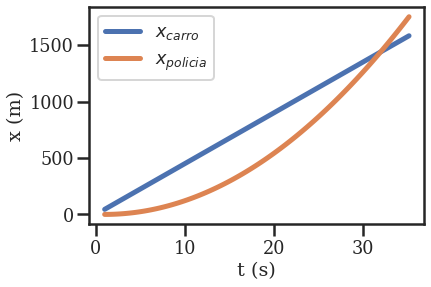

In [15]:
#Plot das trajetórias
fig = plt.figure()

#Obter equações numéricas:
xCf = sp.lambdify(t,xC(t))
xPf = sp.lambdify(t,xP(t))

tpts = np.linspace(tP0,1.1*float(max(tsols)),100)
plt.plot(tpts,xCf(tpts))
plt.plot(tpts,xPf(tpts))
plt.xlabel(r't (s)')
plt.ylabel(r'x (m)')
leg = plt.legend([r'$x_{carro}$',r'$x_{policia}$'])
plt.show()

## Problema 3

<font size=3px>Um foguete é lançado verticalmente a partir do solo. O módulo de sua aceleração total (incluindo a gravitacional) é dada por:
$$
a(t) = a_0 + a_1 e^{-\alpha t}
$$
onde $a_0 = 2$ m/s$^2$, $a_1 = 10$ m/s$^2$ e $\alpha = 5$ s$^{-1}$.
<br> a) Especifique um sistem de coordenadas e determine o vetor velocidade instantânea para qualquer instante de tempo.
<br> b) Determine a posição do foguete para um instante qualquer.
<br> c) A partir da resposta do item anterior calcule a aceleração e verifique se seu resultado é consistente.
<br> d) Podemos considerar que o foguete atinge o espaço ao atingir uma altura $H = 80$ km, quanto tempo leva para o foguete sair da Terra?
</font>

In [16]:
#Definir variaveis/parametros:
x0,v0,a0,a1,alpha,t,tp,H = sp.symbols('x_0,v_0,a_0,a_1,alpha,t,tp,H',positive=True)
C = CoordSys3D('')

In [17]:
a = lambda t: (a0 + a1*sp.exp(-alpha*t))
a(t)

a_0 + a_1*exp(-alpha*t)

In [18]:
#Velocidade:
v0 = 0
v = lambda t: v0 + sp.integrate(a(tp),(tp,0,t))
v(t)*C.j

(a_0*t + a_1/alpha - a_1*exp(-alpha*t)/alpha)*.j

In [19]:
#Posição:
x0 = 0
x = lambda t: x0 + sp.integrate(v(tp),(tp,0,t))
x(t)*C.j

(a_0*t**2/2 + a_1*t/alpha - a_1/alpha**2 + a_1*exp(-alpha*t)/alpha**2)*.j

In [20]:
#Aceleração a partir da posição
sp.diff(x(t),(t,2))

a_0 + a_1*exp(-alpha*t)

In [21]:
#Tempo de subida (aproximado):
xap = lambda t: a0*t**2/2 + a1*t/alpha - a1/alpha**2
tsols = sp.solve(sp.Eq(xap(t),H),t)
tsol = tsols[0]
tsol

(-a_1 + sqrt(2*H*a_0*alpha**2 + 2*a_0*a_1 + a_1**2))/(a_0*alpha)

In [22]:
#Valores numéricos:
subList = [(a0,2.), (a1,10), (H,80000), (alpha,5)]
xnum = lambda t: float((x(t).subs(subList)).evalf())
Hnum = float(H.subs(subList).evalf())
tnum = float(tsol.subs(subList).evalf())
tnum

281.8451873375257

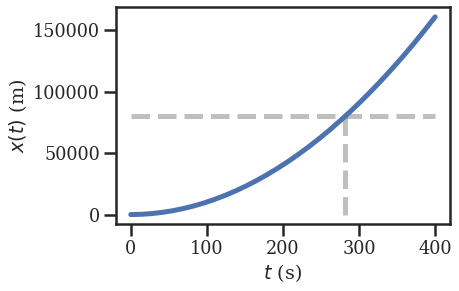

In [23]:
tpts = np.linspace(0,400,30)
plt.plot(tpts,[xnum(tv) for tv in tpts])
plt.hlines(Hnum,xmin=0,xmax=400,linestyle='--',alpha=0.5,color='gray')
plt.vlines(tnum,ymin=0,ymax=80000,linestyle='--',alpha=0.5,color='gray')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$x(t)$ (m)')
plt.show()

## Problema 4

<font size=3px> O sinal amarelo de um farol dura 5 segundos. Você está dirigindo e no instante que o sinal fica amarelo você está a 40 m do sinal. A aceleração máxima do seu carro é 3 m/s$^2$ e a mínima (frenagem) é -5 m/s$^2$. O sinal está antes de um cruzamento com 10 m de largura.
    
<br> a) Qual a máxima velocidade que você pode ter para parar antes do sinal?
<br> b) Qual a mínima velocidade que você precisa ter para passar pelo sinal antes que este fique vermelho?
<br> c) Em quanto tempo você atravessará o cruzamento assumindo que você possui a velocidade mínima do item anterior e continua acelerando com aceleração máxima?
</font>

In [24]:
#Definir variaveis/parametros:
x0,v0,amax,amin,l,d,T,t = sp.symbols('x_0,v_0,a_{max},a_{min},l,d,T,t')
C = CoordSys3D('')
subList = [(T,5.),(amin,-5),(amax,3),(l,10),(d,40)]

In [25]:
#Velocidade instantânea (para aceleração mínima)
v = lambda t: v0 + amin*t
v(t)

a_{min}*t + v_0

In [26]:
#Para que v = 0, em t =T = 5 s:
vmax = sp.solve(sp.Eq(v(T),0),v0)[0]
vmax

-T*a_{min}

In [27]:
vmax.subs(subList).evalf()

25.0000000000000

In [28]:
#Posição (para aceleração maxima)
x0 = 0
x = lambda t: x0 + v0*t + amax*t**2/2
x(t)

a_{max}*t**2/2 + t*v_0

In [29]:
#Devemos ter x(t=T) >= d = 40
vmin = sp.solve(sp.Eq(x(T),d),v0)[0]
vmin

-T*a_{max}/2 + d/T

In [30]:
vmin.subs(subList).evalf()

0.500000000000000

In [31]:
#O tempo será dado para x(t) = d+l = 50 m:
x = lambda t: vmin*t + amax*t**2/2
tf = sp.solve(sp.Eq(x(t),d+l),t)[1]
deltaT = tf-T
deltaT

-T + (T**2*a_{max} - 2*d + sqrt(T**4*a_{max}**2 + 4*T**2*a_{max}*d + 8*T**2*a_{max}*l + 4*d**2))/(2*T*a_{max})

In [32]:
deltaT.subs(subList).evalf()

0.609241150387819

## Problema 5

<font size=3px>
Dois carrinhos de bate-bate estão andando em uma pista plana, conforme indicado na figura.
O primeiro carro realiza um movimento circular, cuja trajetória é dada por:
$$
\vec{r}_1 (t) = R \cos(\omega t) \hat{i} + R \sin(\omega t ) \hat{j}
$$
Já o segundo carro se desloca em linha reta de acordo com a trajetória:
$$
\vec{r}_2 (t) = (v_2 t) \hat{i} + (2 v_2 t) \hat{j}
$$
onde $\omega = 2$ rad/s, $R = 3$ m.
<img src="carros2D.png" alt="Drawing" style="width: 400px;"/>
<br> a) Determine o valor da velocidade $v_2$ para que os carros colidam e o instante de colisão.
<br> b) Qual o ângulo de impacto entre os carros?
</font>

In [33]:
#Definir variaveis/parametros:
R,a,v2,w,t = sp.symbols('R,a,v_2,omega,t',positive=True)
C = CoordSys3D('')
subList = [(R,3.),(w,2)]

In [34]:
#Trajetorias:
r1 = lambda t: R*sp.cos(w*t)*C.i + R*sp.sin(w*t)*C.j
r2 = lambda t: v2*t*C.i + 2*v2*t*C.j

In [35]:
#A colisão ocorrerá quando r1(t) = r2(t). Logo r2_y/r2_x = r1_y/r1_x
rr2 = r2(t).dot(C.j)/r2(t).dot(C.i)
rr1 = r1(t).dot(C.j)/r1(t).dot(C.i)
tsol = sp.solve(sp.Eq(rr2,rr1),t)[0]
tsol

atan(2)/omega

In [36]:
v2sol = sp.solve(sp.Eq(r2(tsol).dot(r2(tsol)),r1(tsol).dot(r1(tsol))),v2)[0]
v2sol

sqrt(5)*R*omega/(5*atan(2))

In [37]:
tsol.subs(subList).evalf(),v2sol.subs(subList).evalf()

(0.553574358897045, 2.42359633342301)

In [38]:
#O ângulo de impacto será dado pelo ângulo entre os vetores velocidade no instante do impacto. Temos:
v1v = sp.diff(r1(t),t)
v2v = sp.diff(r2(t),t)

#O ângulo pode ser calculado pelo produto escalar:
(v1v.subs(t,tsol)).dot((v2v.subs(t,tsol)))

0

In [39]:
#Graficamente:
tC = float(tsol.subs(subList).evalf())
v2num = float(v2sol.subs(subList).evalf())
subList.append((v2,v2num))
tpts = np.linspace(0.,2*tC,100)
x1a = [float(r1(tv).dot(C.i).subs(subList).evalf()) for tv in tpts if tv <= tC]
y1a = [float(r1(tv).dot(C.j).subs(subList).evalf()) for tv in tpts if tv <= tC]
x2a = [float(r2(tv).dot(C.i).subs(subList).evalf()) for tv in tpts if tv <= tC]
y2a = [float(r2(tv).dot(C.j).subs(subList).evalf()) for tv in tpts if tv <= tC]

x1b = [float(r1(tv).dot(C.i).subs(subList).evalf()) for tv in tpts if tv > tC]
y1b = [float(r1(tv).dot(C.j).subs(subList).evalf()) for tv in tpts if tv > tC]
x2b = [float(r2(tv).dot(C.i).subs(subList).evalf()) for tv in tpts if tv > tC]
y2b = [float(r2(tv).dot(C.j).subs(subList).evalf()) for tv in tpts if tv > tC]


v1Vnum = v1v.subs(t,tsol).subs(subList).evalf()
v2Vnum = v2v.subs(t,tsol).subs(subList).evalf()
xC = float(r1(tsol).dot(C.i).subs(subList).evalf())
yC = float(r1(tsol).dot(C.j).subs(subList).evalf())

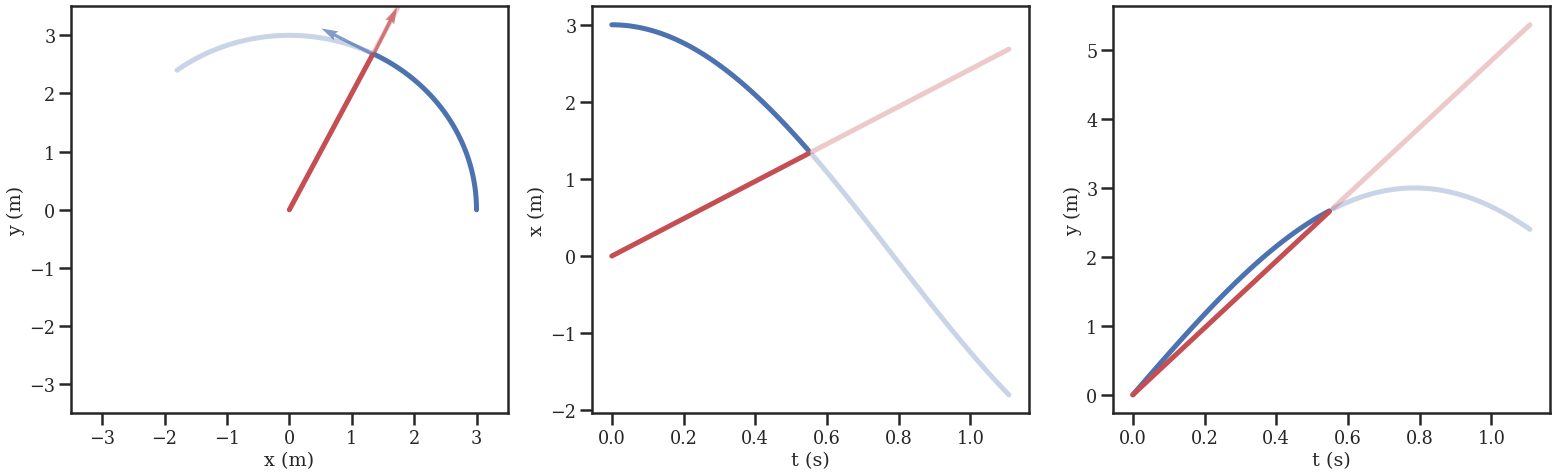

In [40]:
fig = plt.figure(figsize=(22,7))

ax1 = plt.subplot(131)
ax1.plot(x1a,y1a,label='Carro1',c='b')
ax1.plot(x2a,y2a,label='Carro2',c='r')
ax1.plot(x1b,y1b,label='Carro1',c='b',alpha=0.3)
ax1.plot(x2b,y2b,label='Carro2',c='r',alpha=0.3)


ax1.quiver(xC,yC,float(v1Vnum.dot(C.i)),float(v1Vnum.dot(C.j)),color='b',scale=45,alpha=0.7)
ax1.quiver(xC,yC,float(v2Vnum.dot(C.i)),float(v2Vnum.dot(C.j)),color='r',scale=45,alpha=0.7)
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')

ax2 = plt.subplot(132)
ax2.plot(tpts[:len(x1a)],x1a,color='b')
ax2.plot(tpts[:len(x1a)],x2a,color='r')
ax2.plot(tpts[len(x1a):],x1b,color='b',alpha=0.3)
ax2.plot(tpts[len(x1a):],x2b,color='r',alpha=0.3)


ax2.set_xlabel('t (s)')
ax2.set_ylabel('x (m)')

ax3 = plt.subplot(133)
ax3.plot(tpts[:len(y1a)],y1a,color='b')
ax3.plot(tpts[:len(y1a)],y2a,color='r')
ax3.plot(tpts[len(y1a):],y1b,color='b',alpha=0.3)
ax3.plot(tpts[len(y1a):],y2b,color='r',alpha=0.3)
ax3.set_xlabel('t (s)')
ax3.set_ylabel('y (m)')

plt.tight_layout()
plt.savefig('carros2Dcolisao.png')
plt.show()

## Problema 6

<font size=3px> O vetor força elétrica sentida por uma carga elétrica ($Q_1 > 0$) devido à presença de uma carga $Q_2 > 0$ pode ser calculada de acordo com a expressão:
    $$
    \vec{F} = \frac{Q_1 Q_2}{4 \pi \epsilon_0}\frac{1}{r^2}{\hat{r}}
    $$
onde $\vec{r} = \vec{r_1} - \vec{r_2}$ e $\hat{r} = \vec{r}/|\vec{r}|$.
    <br> a) Para a situação mostrada na figura, determine o vetor $\vec{r}$.
    <br> b) Calcule o vetor força.
    <br> c) Calcule o ângulo entre $\vec{F}$ e o eixo x.
<img src="cargas2D.png" alt="Drawing" style="width: 400px;"/>    
</font>

In [41]:
#Definir variaveis/parametros:
a,b,d,Q1,Q2,ep = sp.symbols('a,b,d,Q_1,Q_2,epsilon_0',positive=True)
C = CoordSys3D('')

In [42]:
#Posição das cargas:
r1 = a*C.i + (b+d)*C.j
r2 = (a+d)*C.i + b*C.j
#Vetor r:
r = r1-r2
r

(-d)*.i + d*.j

In [43]:
#Versor r:
rh = r/sp.sqrt(r.dot(r))
rh

(-sqrt(2)/2)*.i + (sqrt(2)/2)*.j

In [44]:
#Vetor força:
F = (Q1*Q2/(4*sp.pi*ep))*rh/(r.dot(r))
F

(-sqrt(2)*Q_1*Q_2/(16*pi*d**2*epsilon_0))*.i + (sqrt(2)*Q_1*Q_2/(16*pi*d**2*epsilon_0))*.j

In [45]:
#Ângulo entre r1 e F:
ct = (C.i).dot(F)/(sp.sqrt(F.dot(F)))
sp.simplify(ct)

-sqrt(2)/2

## Problema 6

<font size=3px> Uma partícula realiza um movimento circular, cuja trajetória é dada por:
$$
\vec{r}(t) = R \cos \theta(t) \hat{i} + R \sin \theta(t)\hat{j}
$$
    onde $\theta(t) = \omega_0 t + \frac{\alpha}{2} t^2$.
<br>
    a) Determine o vetor velocidade da partícula.
<br>    
    b) Determine o ângulo formado entre o vetor velocidade e a posição da partícula em um instante qualquer.
<br>    
    c) Determine o vetor aceleração da partícula. Expresse a sua resposta em função dos versores $\hat{v}$ e $\hat{r}$.
<br>    
    d) Calcule o módulo do vetor velocidade e do vetor aceleração.
<br>
    e) Esboce os vetores posição, velocidade e aceleração para um instante qualquer da trajetória.
</font>

In [46]:
#Definir variaveis/parametros:
w0,a,t,R = sp.symbols('omega_0,alpha,t,R',positive=True)
C = CoordSys3D('')

In [47]:
tt = lambda t: w0*t + (a/2)*t**2
r = lambda t: R*sp.cos(tt(t))*C.i + R*sp.sin(tt(t))*C.j
r(t)

(R*cos(alpha*t**2/2 + omega_0*t))*.i + (R*sin(alpha*t**2/2 + omega_0*t))*.j

In [48]:
#Vetor velocidade:
v = sp.diff(r(t),t)

In [49]:
#Angulo entre v e r:
v.dot(r(t))

0

In [50]:
#Vetor aceleração
a = sp.diff(v,t)
a

(-R*alpha*sin(alpha*t**2/2 + omega_0*t) - R*(alpha*t + omega_0)**2*cos(alpha*t**2/2 + omega_0*t))*.i + (R*alpha*cos(alpha*t**2/2 + omega_0*t) - R*(alpha*t + omega_0)**2*sin(alpha*t**2/2 + omega_0*t))*.j

In [51]:
def animate2D(i,rF,vF,aF,t0,dt,rpoint,rline,vVec,aVec,title=None):
    #Get list of t points up to ith time:
    tf = t0+dt*(i+1)
    tlist = np.linspace(t0,tf,i+2,endpoint=True)
    #Get position:
    rlist = np.array([rF(t) for t in tlist])
    
    #Get position at tf:
    rf = rF(tf)
    #Get velocity at tf:
    vf = vF(tf)
    #Get acceleration at tf:
    af = aF(tf)
    
    if title:
        title.set_text(r't = %1.2g s' %(tf))
    
    vVec.set_offsets(rf)
    aVec.set_offsets(rf)
    vVec.set_UVC(vf[0],vf[1])
    aVec.set_UVC(af[0],af[1])
    rpoint.set_data([rlist[-1,0]],[rlist[-1,1]])
    rline.set_data(rlist[:,0],rlist[:,1])
    
    return (rline,vVec,aVec)


def setupFig(rF,vF,aF,t0,tf):
    rf = rF(tf)
    tpts = np.linspace(t0,tf,100)
    rpts = np.array([rF(t) for t in tpts])
    xmin,xmax = rpts[:,0].min(),rpts[:,0].max()
    xmin = xmin - 0.1*abs(xmin)
    xmax = xmax + 0.1*abs(xmax)
    ymin,ymax = rpts[:,1].min(),rpts[:,1].max()
    ymin = ymin - 0.1*abs(ymin)
    ymax = ymax + 0.1*abs(ymax)    
    
    v0 = vF(t0)
    a0 = aF(t0)
    r0 = rF(t0)
    
    fig = plt.figure(figsize=(8,8))    
    ax1 = plt.subplot(111)
    ax1.scatter([0.],[0.],s=40,c='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')    
    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin,ymax)
    ax1.set_xticks([])
    ax1.set_yticks([])
    title = ax1.set_title("")
        
    #Make initial plots
    rpoint, = ax1.plot([r0[0]],[r0[1]],'o',markersize=10,zorder=10) 
    rline, = ax1.plot([r0[0]],[r0[1]],'--')
    vVec = ax1.quiver(r0[0],r0[1],v0[0],v0[1],color='r',scale=21,zorder=11)
    aVec = ax1.quiver(r0[0],r0[1],a0[0],a0[1],color='g',scale=21,zorder=11)    
    plt.tight_layout()
    
    return fig,rpoint,rline,vVec,aVec,title
w0 = 1.0
alpha = 0.4
R = 1.

theta = lambda t: w0*t + alpha*t**2/2
w = lambda t: w0 + alpha*t
rF = lambda t: np.array([R*np.cos(theta(t)),R*np.sin(theta(t))])
vF = lambda t: np.array([-w(t)*R*np.sin(theta(t)),w(t)*R*np.cos(theta(t))])
aF = lambda t: -w(t)**2*rF(t) + alpha*vF(t)/w(t)
t0 = 0.
tmax = 2*np.pi/w0

#Set up plot
fig,rpoint,rline,vVec,aVec,title = setupFig(rF,vF,aF,t0,tmax)
#Define time step:
dt = (tmax-t0)/100.
#Define real time step:
interval = 200

anim = animation.FuncAnimation(fig, animate2D,
                               frames=int((tmax-t0)/dt), interval=interval, 
                               blit=True, fargs=(rF,vF,aF,t0,dt,rpoint,rline,vVec,aVec,title))
anim.save('circularMovementAcc.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
plt.close()
anim


## Problema 7

<font size=3px> Uma partícula realiza um movimento circular uniforme, cuja trajetória é dada por:
$$
\vec{r}(t) = R \cos \theta(t) \hat{i} + R \sin \theta(t)\hat{j}
$$
    onde $\theta(t) = \omega t$.
Esta partícula possui carga $Q$ e está na presença de um campo magnético $B = -B_0 \hat{k}$. A força magnética pode ser calculada pela expressão:
    $$
    \vec{F}_{B} = Q \vec{v} \times \vec{B} 
    $$
<br>
    a) Determine o vetor velocidade da partícula.
<br>    
    b) Determine a força magnética que atua sobre a partícula.
<br>     
    c) Dado que $\vec{F}_{B} = m \vec{a}$, calcule $\omega_0$ em função de $B_0$.    
</font>

In [52]:
#Definir variaveis/parametros:
w0,B0,t,Q,R,m = sp.symbols('omega,B_0,t,Q,R,m',positive=True)
C = CoordSys3D('')

In [53]:
tt = lambda t: w0*t
r = lambda t: R*sp.cos(tt(t))*C.i + R*sp.sin(tt(t))*C.j
r(t)

(R*cos(omega*t))*.i + (R*sin(omega*t))*.j

In [54]:
#Vetor velocidade:
v = sp.diff(r(t),t)
v

(-R*omega*sin(omega*t))*.i + (R*omega*cos(omega*t))*.j

In [55]:
#Campo magnetico
B = -B0*C.k
#Força
FB = Q*v.cross(B)
FB

(-B_0*Q*R*omega*cos(omega*t))*.i + (-B_0*Q*R*omega*sin(omega*t))*.j

In [56]:
#Vetor aceleração:
a = sp.diff(v,t)
a

(-R*omega**2*cos(omega*t))*.i + (-R*omega**2*sin(omega*t))*.j

In [57]:
wsol = sp.solve(sp.Eq(FB.dot(C.i),m*a.dot(C.i)),w0)[-1]
wsol

B_0*Q/m

## Problema 8

<font size=3px>Um projétil é atirado em direção a um plano inclinado como mostra figura abaixo. A velocidade inicial tem módulo $v_i$ e faz um ângulo $\theta_i$ com a horizontal. O plano possui inclinação
$\phi$ e a aceleração da gravidade tem módulo $g$. Mostre que o projétil percorre uma distância $d$
ao longo do plano inclinado dada por:<br><br>
$$
d = \frac{2 v_i^2 \cos \theta_i \sin (\theta_i -\phi)}{g \cos^2 \phi}
$$
</font>
<img src="FS_01.png" alt="Drawing" style="width: 400px;"/>

Resposta= 3.48 m


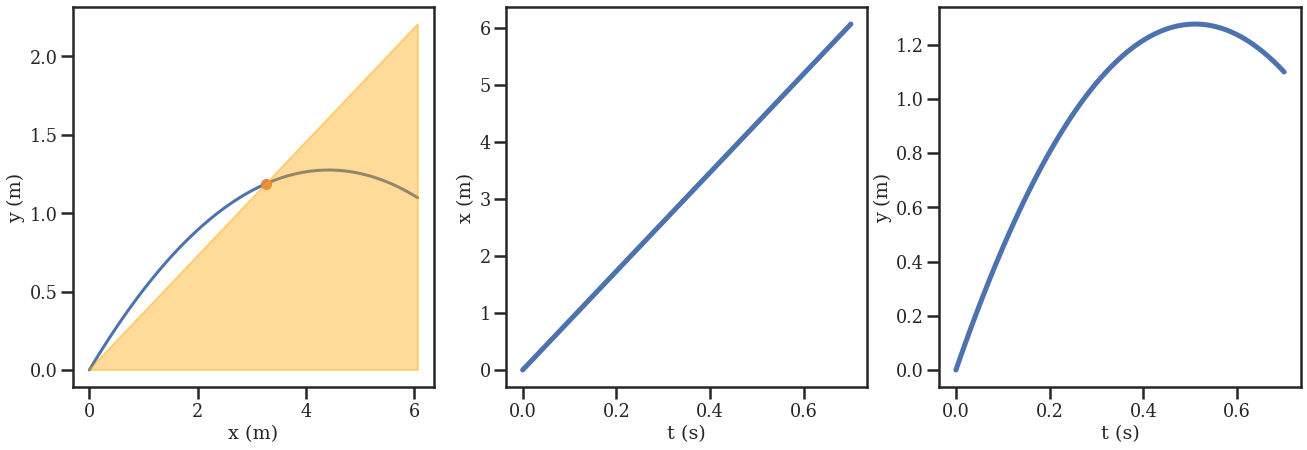

In [58]:
fig = plt.figure(figsize=(22,7))
thetai = 30.*np.pi/180.
vi = 10.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,0.
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.

phi = 20.*np.pi/180.
lF = lambda x: x*np.tan(phi)

d = (2*vi**2*np.cos(thetai)*np.sin(thetai-phi)/(g*(np.cos(phi)**2)))
xd = d*np.cos(phi)
yd = d*np.sin(phi)

tpts = np.linspace(0.,0.7,100)
ax1 = plt.subplot(131)
ax1.plot(xF(tpts),yF(tpts),linewidth=3)
ax1.fill([xF(tpts).min(),xF(tpts).max(),xF(tpts).max()],
         [lF(xF(tpts).min()),lF(xF(tpts).min()),lF(xF(tpts).max())],zorder=10,alpha=0.4,c='orange')
ax1.plot(xd,yd,'o',markersize=10)
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax2 = plt.subplot(132)
ax2.plot(tpts,xF(tpts))
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
ax3.plot(tpts,yF(tpts))
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
print('Resposta= %.2f m' %d)

### Problema 9

<font size=3px>
Uma bola é arremessada com velocidade inicial $v_i = 30,0$ m/s com um ângulo de $45^{\circ}$ com relação à horizontal. 
A bola está a 1,2 m acima do solo no momento do arremesso e existe um muro de 10 m de altura à uma distância de 80 m do arremessador.
<br> a) Determine o vetor velocidade inicial ($\vec{v}_i$)
<br> b) Determine o alcance horizontal da bola.
<br> c) A bola consegue passar por cima do muro?
<br> d) Assumindo que o ângulo de arremesso não se altera, qual a velocidade mínima para que a bola caia do outro lado do muro?
</font>

In [59]:
fig = plt.figure(figsize=(22,7))
thetai = 45.*np.pi/180.
vi = 30.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,1.2
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
tmin,tmax = t0,5.
tpts = np.linspace(tmin,tmax,100)
dt = 0.1

ax1 = plt.subplot(131)
line1, = ax1.plot(xF(tpts),yF(tpts),'--')
ax1.plot([80.,80.],[0.,10.])
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax1.set_ylim(0.,yF(tpts).max()*1.1)
text = ax1.text(1., yF(tpts).max(), r'$v_i = %1.2f$ m/s' %vi, fontsize=30)
ax2 = plt.subplot(132)
line2, = ax2.plot(tpts,xF(tpts),'--')
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
line3, = ax3.plot(tpts,yF(tpts),'--')
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
ax3.set_ylim(0.,yF(tpts).max()*1.1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


def init():
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)
def animate(i):
    vi = 30.-float(i)/30.
    v0x = vi*np.cos(thetai)
    v0y = vi*np.sin(thetai)
    xF = lambda t: x0 + v0x*(t-t0)
    yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=150, 
                               blit=True)
plt.close()
anim

### Problema 10

<font size=3px>
Um goleiro chuta uma bola com velocidade inicial $v_0$ a um ângulo $\theta$ com relação à horizontal.
Um jogador, que no momento do chute está a uma distância $d$ do goleiro, corre em linha reta para receber
o lançamento com velocidade constante $v_j$. Assuma que o tempo de reação do jogador é de 1,5 segundos,
de tal forma que ele só começa a correr 1,5 segundos após o chute do goleiro.
<br> a) Escreva o vetor posição da bola e do jogador em função das variáveis dadas.
<br> b) Qual deve ser o ângulo do chute para que a bola possua alcance máximo? Qual será este alcance?
<br> c) Em que instante a bola atingirá sua altura máxima? Qual a sua posição neste instante?
<br> d) Assuma agora que o jogador consegue alcançar a bola exatamente no instante em que esta atinge o solo. Se $v_0 = 30$ m/s, $\theta = 30^{\circ}$ e $d = 70$ m, qual a velocidade do jogador?
</font>

In [60]:
#Define variáveis
t,v0,vj,d,tj,theta,h,g,lmax = sp.symbols('t v_0 v_j d t_j theta h g l_{max}')
#Define sistema de coordenadas
C = CoordSys3D('')

#### Item a)

In [61]:
xbola = lambda t: v0*sp.cos(theta)*t
ybola = lambda t: v0*sp.sin(theta)*t - g*t**2/2
xjogador = lambda t: d+vj*(t-tj)
yjogador = lambda t: 0

In [62]:
#Vetor posição da bola:
rbola = lambda t: xbola(t)*C.i + ybola(t)*C.j
rbola(t)

(t*v_0*cos(theta))*.i + (-g*t**2/2 + t*v_0*sin(theta))*.j

In [63]:
#Vetor posição da jogador:
rjogador = lambda t: xjogador(t)*C.i + yjogador(t)*C.j
rjogador(t)

(d + v_j*(t - t_j))*.i

#### Item b)

In [64]:
#Tempo em que a bola atinge o solo:
tsolo = sp.solve(sp.Eq(ybola(t),0),t)[1]
tsolo

2*v_0*sin(theta)/g

In [65]:
#Alcance da bola:
xmax = sp.simplify(xbola(tsolo))
xmax

v_0**2*sin(2*theta)/g

In [66]:
#Logo o alcance máximo será para sin(2*theta) = 1, ou seja, theta = 45 graus (pi/4)
thetamax = sp.pi/4
xmax = sp.simplify(xbola(tsolo).replace(theta,thetamax))
xmax

v_0**2/g

#### Item c)

In [67]:
#A altura máxima ocorrerá quando vy = 0:
vbola = lambda t: v0*sp.cos(theta)*C.i + (v0*sp.sin(theta) - g*t)*C.j
vbola(t)

(v_0*cos(theta))*.i + (-g*t + v_0*sin(theta))*.j

In [68]:
tmax = sp.solve(sp.Eq(vbola(t).dot(C.j),0),t)[0]
tmax

v_0*sin(theta)/g

In [69]:
rbola(tmax)

(v_0**2*sin(theta)*cos(theta)/g)*.i + (v_0**2*sin(theta)**2/(2*g))*.j

#### Item d)

In [70]:
rbola(tsolo)

(2*v_0**2*sin(theta)*cos(theta)/g)*.i

In [71]:
rjogador(tsolo)

(d + v_j*(-t_j + 2*v_0*sin(theta)/g))*.i

In [72]:
vjogador = sp.solve(sp.Eq(rbola(tsolo).dot(C.i),rjogador(tsolo).dot(C.i)),vj)[0]
vjogador

(d*g - v_0**2*sin(2*theta))/(g*t_j - 2*v_0*sin(theta))

In [73]:
#Velocidade do jogador:
vjogador.subs({d: 70., v0 :  30., g : 9.8, theta : np.pi/6, tj: 1.5})

6.10606950365979

In [74]:
#Valores numericos:
numValues = {}
numValues[d] = 70.
numValues[v0] = 30.
numValues[g] = 9.8
numValues[theta] = np.pi/6
numValues[tj] = 1.5
numValues[vj] = vjogador.subs(numValues)
tf = float(tsolo.subs(numValues).evalf())
tpts = np.linspace(0.,tf,100)
xB = sp.lambdify(t,xbola(t).subs(numValues))
yB = sp.lambdify(t,ybola(t).subs(numValues))
xJ = sp.lambdify(t,xjogador(t).subs(numValues))
yJ = sp.lambdify(t,yjogador(t))

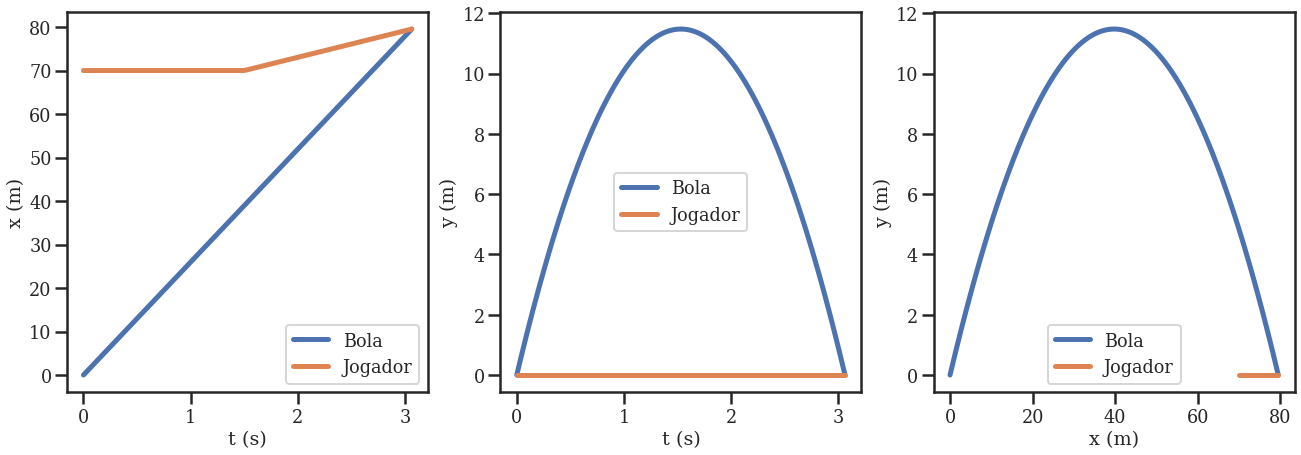

In [75]:
fig = plt.figure(figsize=(22,7))
plt.subplot(1, 3, 1)
plt.plot(tpts,xB(tpts),label='Bola')
plt.plot(tpts,xJ(tpts)*np.heaviside(tpts-1.5,0.)+[70.]*len(tpts)*np.heaviside(1.5-tpts,0.),label='Jogador')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(tpts,yB(tpts),label='Bola')
plt.plot(tpts,[0.]*len(tpts),label='Jogador')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(xB(tpts),yB(tpts),label='Bola')
plt.plot(xJ(tpts)*np.heaviside(tpts-1.5,0.)+[70.]*len(tpts)*np.heaviside(1.5-tpts,0.),
         [0.]*len(tpts),label='Jogador')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

### Problema 11

<font size=3px>
Um carro percorre uma pista circular de raio $R = 500$ m. O velocímetro do carro marca
uma velocidade constante $v_0 = 36$ km/h.
<br> a) Qual a velocidade angular do carro?
<br> b) Qual o período de rotação do carro?
<br> c) Determine o vetor aceleração no momento em que o carro está no extremo sul da pista.
</font>

In [76]:
v0,w,R,a,T = sp.symbols('v_0, omega, R, a, T')
from sympy.vector import CoordSys3D
C = CoordSys3D('')

In [77]:
sp.Eq(w,v0/R)

Eq(omega, v_0/R)

In [78]:
wsol = sp.solve(sp.Eq(w,v0/R),w)[0].subs({v0 : 10., R : 500.})
wsol

0.0200000000000000

In [79]:
sp.Eq(T,2*sp.pi/w)

Eq(T, 2*pi/omega)

In [80]:
sp.solve(sp.Eq(T,2*sp.pi/w),T)[0].subs({v0 : 10., R : 500., w : wsol})

100.0*pi

In [81]:
sp.Eq(a,v0**2/R)

Eq(a, v_0**2/R)

In [82]:
aVec = (v0**2/R)*(-C.j)
aVec

(-v_0**2/R)*.j

### Problema 12

<font size=3px>
Um corpo inicia um movimento circular de raio $R$ com velocidade angular $\omega_0$. Durante
o movimento circular sua velocidade linear diminui (em módulo) com uma taxa $a$.
<br> a) Em quanto tempo o corpo irá parar?
<br> b) Qual o vetor aceleração total no instante inicial?
</font>

In [83]:
R,w0,v0,a,t,tf = sp.symbols('R omega_0 v_0 a t tf')
from sympy.vector import CoordSys3D
C = CoordSys3D('')

#### item a

In [84]:
sp.Eq(v0,w0*R)

Eq(v_0, R*omega_0)

In [85]:
sp.Eq(v0 - a*t,0)

Eq(-a*t + v_0, 0)

In [86]:
tf = sp.solve(sp.Eq(v0 - a*t,0),t)[0].subs({v0 : w0*R})
tf

R*omega_0/a

#### item b

In [87]:
ac = -w0**2*R*C.i
ac

(-R*omega_0**2)*.i

In [88]:
at = -a*C.j
at

(-a)*.j

In [89]:
aTot = ac + at
aTot

(-R*omega_0**2)*.i + (-a)*.j

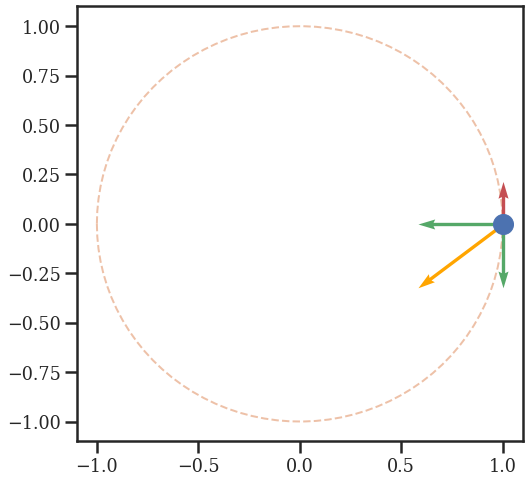

In [90]:
aTotV = aTot.subs({R: 1., a : 3., w0 : 2.})
atV = at.subs({R: 1., a : 3, w0 : 2.})
acV = ac.subs({R: 1., a : 3, w0 : 2.})
vV = (w0*R*C.j).subs({R: 1., a : 3., w0 : 2.})
fig = plt.figure(figsize=(8,8))
plt.plot([1.],[0.],'o',markersize=20)
plt.quiver(1.,0.,float(vV.dot(C.i)),float(vV.dot(C.j)),color='r',scale=21)
plt.quiver(1.,0.,float(acV.dot(C.i)),float(acV.dot(C.j)),color='g',scale=21)
plt.quiver(1.,0.,float(atV.dot(C.i)),float(atV.dot(C.j)),color='g',scale=21)
plt.quiver(1.,0.,float(aTotV.dot(C.i)),float(aTotV.dot(C.j)),color='orange',scale=21)
thetaPts = np.linspace(-np.pi,np.pi,100)
plt.plot(np.cos(thetaPts),np.sin(thetaPts),'--',linewidth=2,zorder=-1,alpha=0.5)
plt.show()